In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk

In [2]:
#import glob package
import glob

In [3]:
path2 = '/Users/paulraymond/Downloads/nyt-comments/Comments'
all_files2 = glob.glob(path2 + "/*")

files2 = []

for filename in all_files2:
    df = pd.read_csv(filename, index_col = None, header=0)
    files2.append(df)
    
comments = pd.concat(files2, axis=0, ignore_index=True)

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,31,32) have mixed ty

In [4]:
#create train and test sets
train = comments[:500000]
test = comments[500000:600000]

In [5]:
#organize by flagged comments and unflagged comments, and view first rows
comments_train = train['commentBody']
target_train = train['editorsSelection']
comments_test = test['commentBody']
target_test = test['editorsSelection']
print(comments_train.head(1))
print(target_train.head(1))
print(comments_test.head(1))
print(target_test.head(1))
target_train.unique()

0    The snake-filled heads comment made me think o...
Name: commentBody, dtype: object
0    0
Name: editorsSelection, dtype: int64
500000      Before I read this article I had never thoug...
Name: commentBody, dtype: object
500000    0
Name: editorsSelection, dtype: int64


array([0, 1])

In [6]:
#import libraries used in lab
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
# from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

(500000,)
(500000,)
(100000,)
(100000,)


['the',
 'snake-filled',
 'heads',
 'comment',
 'made',
 'think',
 'medusa',
 'i',
 'hope',
 'loses',
 'retrograde']

275082

[('i', 396095),
 ("'s", 249705),
 ('trump', 182428),
 ('the', 177937),
 ("n't", 161772),
 ('people', 118394),
 ('would', 114759),
 ('’', 104452),
 ('it', 98198),
 ('one', 97339),
 ('like', 87712),
 ('us', 76158),
 ('get', 59842),
 ('many', 58949),
 ('and', 58584),
 ('time', 55970),
 ('this', 55481),
 ('we', 54666),
 ('even', 53859),
 ('think', 51770)]

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


(500000, 149134)

Average Number of Non-Zero Elements in Vectorized Articles: 50.223908
Percentage of columns containing 0: 0.9996632296592326


(500000,)
(500000,)


Multinomial Naive Bayes
Training Accuracy: 0.9842 		 Testing Accuracy: 0.9791

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9959 		 Testing Accuracy: 0.9791


NB Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97911
           1       0.00      0.00      0.00      2089

   micro avg       0.98      0.98      0.98    100000
   macro avg       0.49      0.50      0.49    100000
weighted avg       0.96      0.98      0.97    100000

-----------------------------------------------------
RF Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97911
           1       0.00      0.00      0.00      2089

   micro avg       0.98      0.98      0.98    100000
   macro avg       0.49      0.50      0.49    100000
weighted avg       0.96      0.98      0.97    100000



/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[97911  2089]
 [    0     0]]


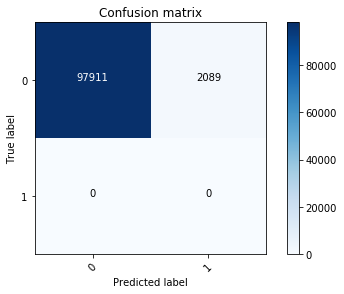

AUC: 0.5


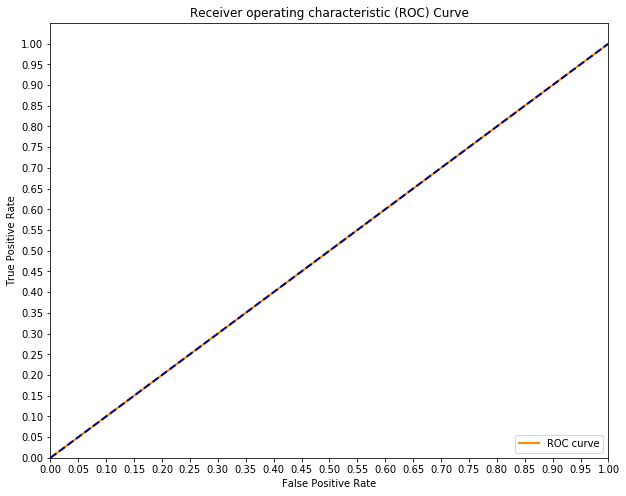

0    492131
1      7869
Name: editorsSelection, dtype: int64


In [86]:
# type(comments_train)
# comments_list = list(comments_train)

In [85]:
# a = np.reshape(comments_train, (-1,1))

In [91]:
# X_smote, y_smote = smote_nc.fit_sample(comments_train, target_train)

7869

In [97]:
train.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1517529462,5a7258e410f40f00018bed7d,835.0,The snake-filled heads comment made me think o...,25791250.0,25791250.0,<br/>,comment,1.517508e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529462,Jennie,79172841.0,WA,NaN,NaN
1,1517529428,5a7258e410f40f00018bed7d,835.0,She-devil reporting for duty!,25795675.0,25795675.0,<br/>,comment,1.517527e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529428,Nice White Lady,66376882.0,Seattle,NaN,NaN
2,1517529427,5a7258e410f40f00018bed7d,835.0,XX is the new mark of the devil.,25792078.0,25792078.0,<br/>,comment,1.517511e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529427,Stan Sutton,27924638.0,"Westchester County, NY",NaN,NaN
3,1517529425,5a7258e410f40f00018bed7d,835.0,"""Courtland Sykes"" should be writing for The On...",25791604.0,25791604.0,<br/>,comment,1.517510e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529425,Phil Carson,31909107.0,Denver,NaN,NaN
4,1517529418,5a7258e410f40f00018bed7d,835.0,"I happen to descend for a few of them, because...",25795241.0,25795241.0,<br/>,comment,1.517525e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529418,Abby,55271958.0,Tucson,NaN,NaN


(7869, 34)

(7869, 34)

In [ ]:
#split into feature and target

Average Number of Non-Zero Elements in Vectorized Articles: 63.51378828313636
Percentage of columns containing 0: 0.9982827149308331


In [136]:
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.7228 		 Testing Accuracy: 0.208

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9832 		 Testing Accuracy: 0.6624


NB Classification report:
              precision    recall  f1-score   support

           0       0.99      0.19      0.31      4853
           1       0.03      0.96      0.07       147

   micro avg       0.21      0.21      0.21      5000
   macro avg       0.51      0.57      0.19      5000
weighted avg       0.97      0.21      0.31      5000

-----------------------------------------------------
RF Classification report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      4853
           1       0.05      0.59      0.09       147

   micro avg       0.66      0.66      0.66      5000
   macro avg       0.52      0.62      0.44      5000
weighted avg       0.95      0.66      0.77      5000



In [139]:
#visualize the comments
df_viz = pd.concat([comments_train, target_train], axis=1)
df_viz.shape

(500000, 2)

In [140]:
#taking a sample to expedite the run time
df_viz_sample = df_viz.sample(1000)
df_viz_sample['editorsSelection'].get_values().sum()

22

In [141]:
df_viz_selected = df_viz_sample['commentBody'].loc[df_viz_sample['editorsSelection']==1]
df_viz_normal = df_viz_sample['commentBody'].loc[df_viz_sample['editorsSelection']==0]

In [142]:
df_viz_selected.head()

438826    Riddle, a huge number of jobs now are in the g...
381518    I made a midlife career change when my husband...
127817    I don't mean to denigrate Miranda's talent but...
37324     Republicans stopped the economy in its tracks ...
25683     People who doubt Dylan Farrow's account of her...
Name: commentBody, dtype: object

In [ ]:
#complete visualization